# Psso a Passo do Algoritmo

- **Inicialização:** Gerar população aleatória de betores (cada vetor = solução candidata).
- **Avaliação:** Calcular o fitness (valor da função).
- **Seleção:** Escolher indivíduos com melhores fitness.
- **Cruzamento (Crossover):** Combinar partes de indivíduos.
- **Mutação:** Alterar levemente alguns genes.
- **Repetição:** Iterar até o número máximo de gerações ou convergência.
- **Resultado final:** Mostrar o melhor indivíduo encontrado.

## Biblioteca

In [131]:
import random
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
from deap import base, creator, algorithms, tools

# Utils
from utils.functions import rastrigin
from utils import config

## Configurando o DEAP

In [132]:
# Semente aleatório (para reprodutibilidade)
#random.seed(config.SEED)
#np.random.seed(config.SEED)

# Gera o toolbox responsável por registrar as configurações do framework
toolbox = base.Toolbox()

In [133]:
# Cria o tipo de função indivíduo
creator.create("Minimization", base.Fitness, weights=(-1.0,))
creator.create("Genes", list, fitness=creator.Minimization)

# Registra os nomes e os tipos de individuos, fitness e população
toolbox.register("Attribute", random.uniform, config.BOUND_LOW, config.BOUND_UP)
toolbox.register("Chromossome", tools.initRepeat, creator.Genes, toolbox.Attribute, n=config.IND_SIZE)
toolbox.register("Population", tools.initRepeat, list, toolbox.Chromossome)

# Registra os operadores
toolbox.register("evaluate", rastrigin)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selBest)
#toolbox.register("select", tools.selTournament, tournsize=5)

# Gera o formato de análise estátistica
st = tools.Statistics(key=lambda ind: ind.fitness.values)
st.register("Min", np.min)
st.register("Avg", np.mean)

/mnt/SegundoHD/Documentos/Projetos/OtimizacaoDeFuncaoMatematica/.conda/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Minimization' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/mnt/SegundoHD/Documentos/Projetos/OtimizacaoDeFuncaoMatematica/.conda/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Genes' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [134]:
# Escolha da estratégia
USE_PLUS_STRATEGY = True #True → (μ + λ), False → (μ, λ)

best_overall = None
best_fitness = float('inf') # Pois é minimização

if USE_PLUS_STRATEGY:
    print('Estratégia (μ + λ)')
else:
    print('Estragégia (μ, λ)')

for i in range(config.TRIALS):
    pop = toolbox.Population(n=config.MU)
    if USE_PLUS_STRATEGY:
        finalPop, log = algorithms.eaMuPlusLambda(pop, toolbox, config.MU, config._LAMBDA, config.PROB_CX, config.PROB_MT, config.N_GER,
                                                stats=st, verbose=False)
    else:
        finalPop, log = algorithms.eaMuCommaLambda(pop, toolbox, config.MU, config._LAMBDA, config.PROB_CX, config.PROB_MT, config.N_GER,
                                                stats=st, verbose=False)

    bestSolution = tools.selBest(finalPop, 1)
    current_best = bestSolution[0]
    current_fitness = current_best.fitness.values[0]
    print(f'Run: {i} - Fitness: {current_fitness}')

    if current_fitness < best_fitness:
        best_fitness = current_fitness
        best_overall = current_best

Estratégia (μ + λ)
Run: 0 - Fitness: 1.0134365315872031
Run: 1 - Fitness: 2.0120018790038827
Run: 2 - Fitness: 1.001792352420857
Run: 3 - Fitness: 4.979790604304419
Run: 4 - Fitness: 4.990361272422447
Run: 5 - Fitness: 2.990036558464851
Run: 6 - Fitness: 3.9810940023321137
Run: 7 - Fitness: 2.9890114064267905
Run: 8 - Fitness: 3.980062944995339
Run: 9 - Fitness: 4.987845195798023
Run: 10 - Fitness: 5.973828175112153
Run: 11 - Fitness: 0.997013880033748
Run: 12 - Fitness: 2.986126931653679
Run: 13 - Fitness: 2.9881907373003997
Run: 14 - Fitness: 4.984046924146625
Run: 15 - Fitness: 2.989020400211338
Run: 16 - Fitness: 1.995563629285833
Run: 17 - Fitness: 4.981961621881609
Run: 18 - Fitness: 4.976935523222217
Run: 19 - Fitness: 2.9932868609463554


In [135]:
# Imprime a melhor solução da população final
print(f"===== MELHOR RESULTADO GLOBAL ({config.TRIALS} RODADAS) =====")
print(f"Melhor Fitness: {best_fitness}")
print(f"Melhor Indivíduo: {best_overall}")

===== MELHOR RESULTADO GLOBAL (20 RODADAS) =====
Melhor Fitness: 0.997013880033748
Melhor Indivíduo: [0.002277511992148557, 0.00122079138414663, 0.0016596390119763352, 0.9940069804395557, 0.00014342135215417596]


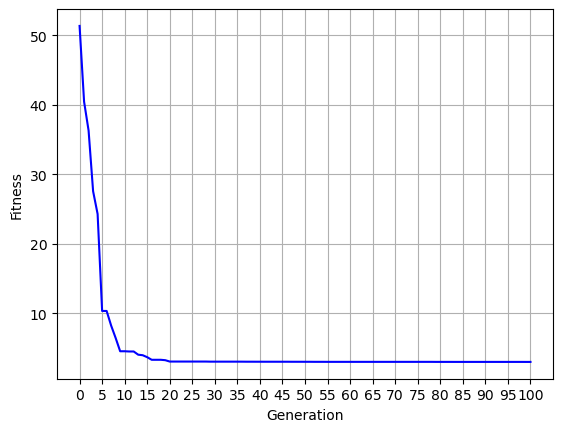

In [136]:
# Plot best solutions
minFit = log.select("Min")

plt.plot(minFit, color='blue')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.grid(True)
plt.xticks(range(0, config.N_GER+1, 5))
plt.show()

In [ ]:

# ====== SALVAR RESULTADOS ======
os.makedirs("results", exist_ok=True)

# Configuraçẽos
algorithm_name = "Estratégia (μ + λ)"

# Obtém data e hora atuais
data_hora = datetime.now().strftime("%d/%m/%Y %H:%M:%S")

# Salva resultados num arquivo .txt
with open("results/resultados.txt", "a") as f:
    f.write("\n" + "="*60 + "\n")
    f.write(f"Data e hora da execução: {data_hora}\n")
    f.write(f"Algoritmo: {algorithm_name}")
    f.write(f"Melhor Indivíduo e seu Fitness de {config.TRIALS} rodadas\n")
    f.write(f"Melhor indivíduo: {best_overall}\n")
    f.write(f"Melhor fitness: {best_fitness}\n")

# Salva o gráfico gerado
plt.figure()
plt.plot(minFit, color='blue')
plt.xlabel('Geração')
plt.ylabel('Menor Fitness')
plt.xticks(range(0, config.N_GER+1, 5))
plt.grid(True)
plt.title(f'Convergência - {algorithm_name}')
plt.savefig(f"results/grafico_convergencia_{algorithm_name.replace(' ', '_').replace('(', '').replace(')','')}.png")
plt.close()